<a href="https://colab.research.google.com/github/PStettler/DSF-DCBP-Philip-Stettler/blob/main/codingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Coding Task 2 - Philip Stettler </h1>

<p> Loading of all packes we need: </p>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf #useful functions for filtering
import skimage.morphology as skm #functions for size/shape specification
import os #for loop file import

<p> Import Images and convert them to .png files </p>

In [4]:
#as in notebook 11 (source from github), one approach to convert the files is via PIL:
!pip install pillow_heif 
from PIL import Image
import pillow_heif

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
folder  = '/content/drive/MyDrive/ImagesDSF/'

for image in os.listdir(folder):
  url_name = image
  heif_file = pillow_heif.read(folder+url_name)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_name = url_name.split('.')[0]+'.png'
  image.save(folder+url_name, format="png")
  #this is not very efficient, took ~1min 30 sec to run

<h4> With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. </h4>

(4032, 3024, 3) (4032, 3024)


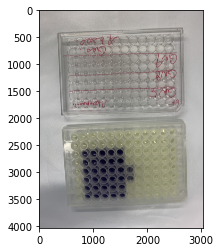

<Figure size 720x720 with 0 Axes>

(2016, 3024)


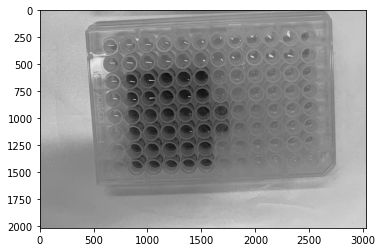

In [17]:
#loading one of the images and showing the B channel
url_name = 'IMG_5384.png'
pngRGB  = io.imread(folder+url_name)
plt.imshow(pngRGB)
pngGrayScale = pngRGB[:,:,2]
print(pngRGB.shape,pngGrayScale.shape)

#plotting image
plt.figure(figsize=(10,10))
plt.show()

#cropping so I only see the lower part, changing color to gray
pngGrayScale = pngGrayScale[pngGrayScale.shape[0]//2:pngGrayScale.shape[0],:]
print(pngGrayScale.shape)
plt.imshow(pngGrayScale, cmap ='gray')
plt.show()

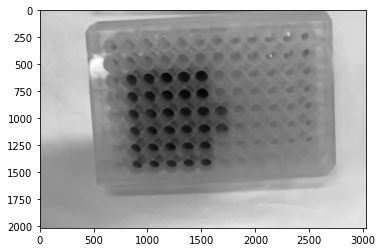

In [18]:
#apply filter to reduce white reflections

image_mean = skf.median(pngGrayScale,selem=skm.disk(20))
plt.imshow(image_mean, cmap ='gray')
plt.show() #much better

<p> apply a threshold to the image to separate black from non black pixels </p>

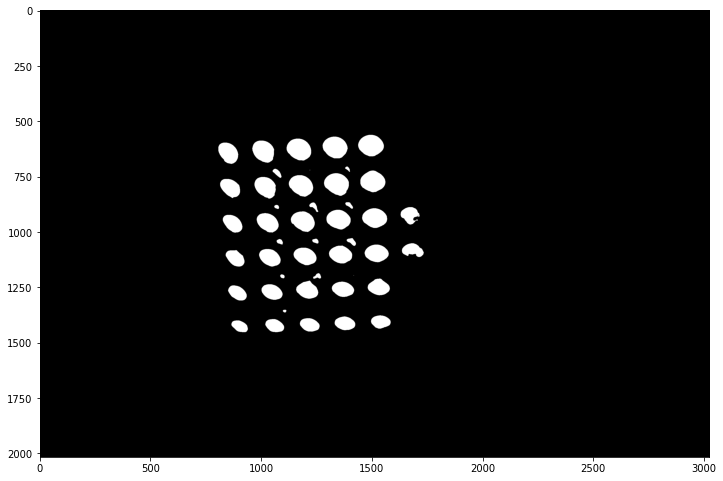

In [49]:
threshold_manual = 60 #chosen by trial

#create a mask using a logical operation
image_threshold = image_mean<threshold_manual

plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

<h4> Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. </h4>

In [58]:
#I made use of the code from @TowsifAhamed on github:
#https://github.com/TowsifAhamed/white-and-black-dot-count-by-image-processing/blob/master/white%20dot%20count.py 
import cv2
gray = image_mean

#threshold, using threshold value = 58
th, threshed = cv2.threshold(gray, 60, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#finding contours
cnts = cv2.findContours(threshed, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2]

#filter by area. Found that the best count was found using s1= 0 and s2= 200000 
s1= 0
s2 = 2000000
xcnts = []
for cnt in cnts:
    if s1<cv2.contourArea(cnt) <s2:
        xcnts.append(cnt)

print("\nNumber of bins: {}".format(len(xcnts)))


Number of bins: 31


<p> the correct number is 32. I did not find a threshold to reach this number unfortunately. </p>

<h4> Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. </h4>

In [59]:
# importing all image files and converting them as needed is no issue:
# for image in os.listdir(folder):
#     if image.endswith(".png"):
#       url_name = image
#       pngRGB  = io.imread(folder+url_name)
#       pngGrayScale = pngRGB[:,:,2]
#       pngGrayScale = pngGrayScale[pngGrayScale.shape[0]//2:pngGrayScale.shape[0],:]
#         image_mean = skf.median(pngGrayScale,selem=skm.disk(20))
#         plt.imshow(image_mean, cmap ='gray')
#         plt.show()
#this shall not be executed here because this takes a long time to run on all images.

#the issue is the threshold that has to be chosen individually for every picture. 
#One approach may be to standardize all pictures, so that the a certain real life color would translate to 
#the same GrayScale value in every picture. However, this would (for proper functioning) require a 
#known color to be present on every picture.